# Tutorial

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

# Parameters

# Model

In [3]:
from neuroprobnum.models.hodgkin_huxley import compile_cython
compile_cython()

running build_ext



In [4]:
from neuroprobnum.models.hodgkin_huxley import HHNeuron

neuron = HHNeuron()
neuron

HH_neuron

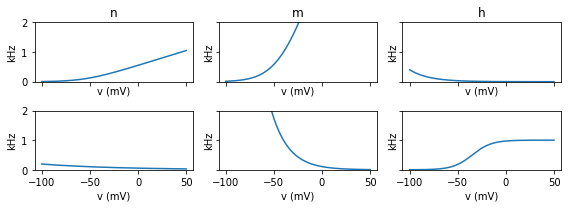

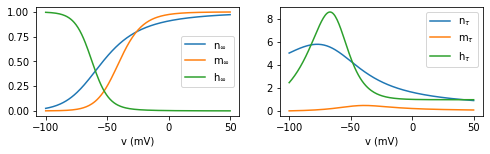

In [5]:
neuron.plot()

# Stimulus

In [7]:
from neuroprobnum.utils import stim_utils

Iamp = 0.1
tmax = 40
t0 = 0

stim = stim_utils.IStimStep(Iamp=Iamp, onset=5, offset=tmax-5)
neuron.get_Istim_at_t = stim.get_I_at_t

# Create solution

## Deterministic solution

In [8]:
from neuroprobnum.solver import ode_solver

det_solver = ode_solver.get_solver(
    odefun=neuron.eval_ydot, t0=t0, y0=neuron.get_y0(),
    h0=0.01, method='RKBS', pert_method=None,
    adaptive=True, adaptive_params=dict(max_step=1, rtol=1e-3, atol=1e-3),
)
det_sol = det_solver.solve(tmax=tmax, return_vars=['ys', 'ydots', 'errors'], show_progress=False)

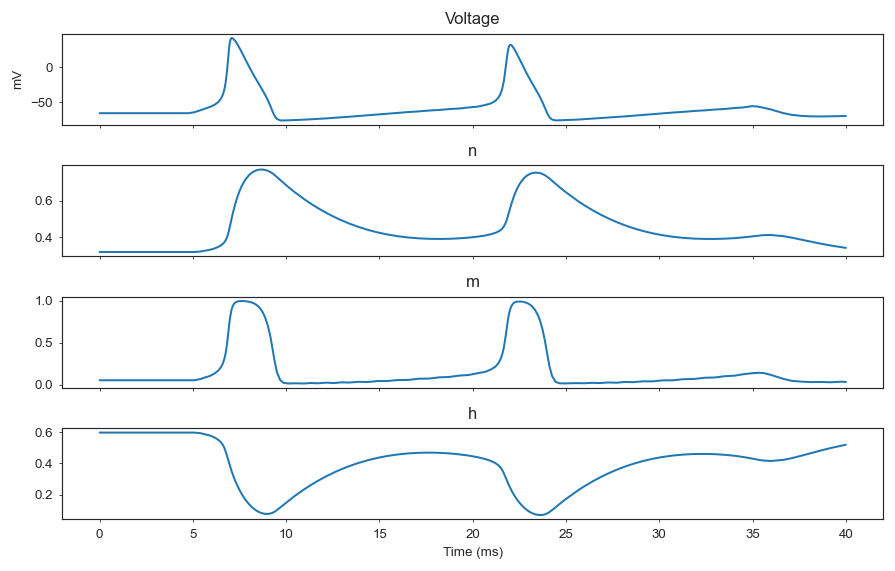

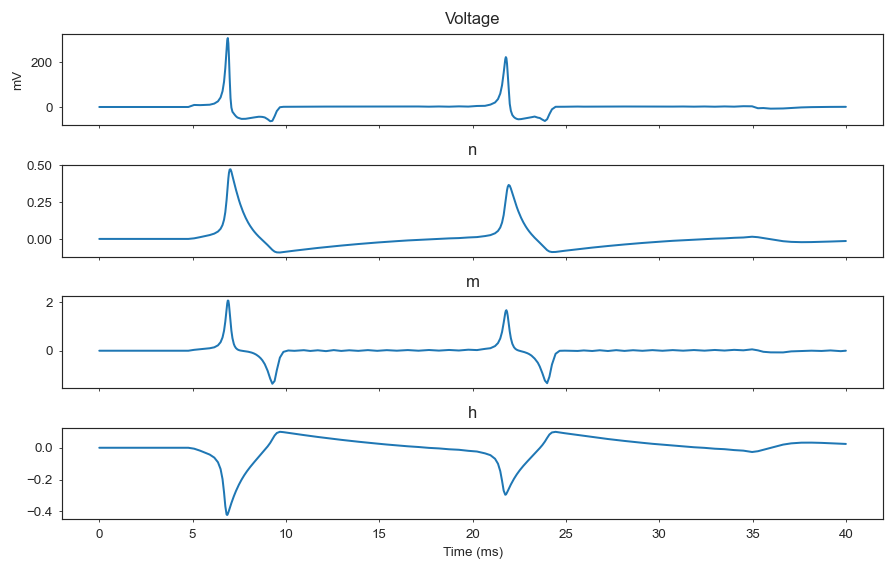

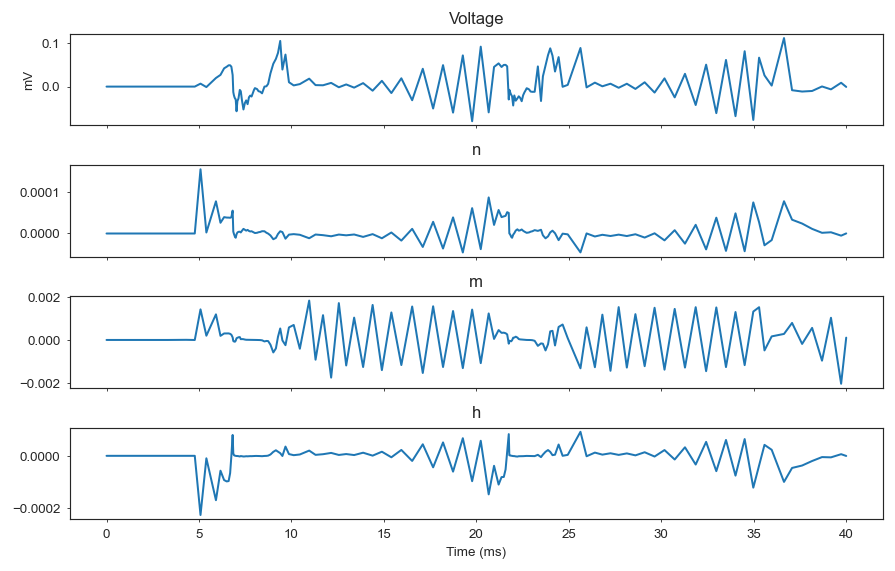

In [9]:
plot_kws = dict(max_nx_sb=1, max_ny_sb=4, y_names=neuron.get_y_names(), y_units=neuron.get_y_units(), t_unit=neuron.get_t_unit())

det_sol.plot(plot_type='ys', **plot_kws)
det_sol.plot(plot_type='ydots', **plot_kws)
det_sol.plot(plot_type='errors', **plot_kws)

## Probabilistic solution

In [10]:
prb_solver = ode_solver.get_solver(
    pert_method='conrad',
    odefun=neuron.eval_ydot, t0=t0, y0=neuron.get_y0(), h0=0.01, method='RKBS',
    adaptive=True, adaptive_params=dict(max_step=1, rtol=1e-3, atol=1e-2),
)
prb_sol = prb_solver.solve(tmax=tmax, return_vars=['ys', 'ydots', 'errors'], show_progress=False, n_samples=20)

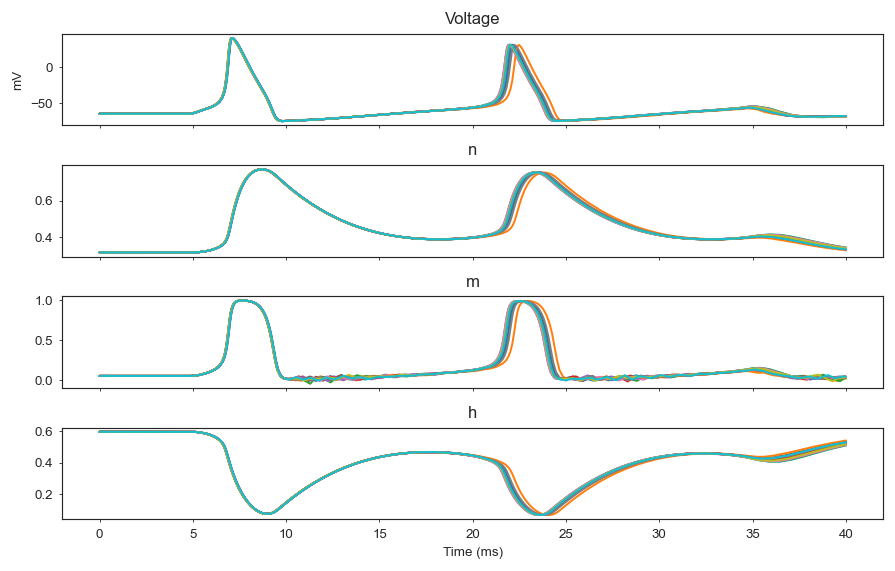

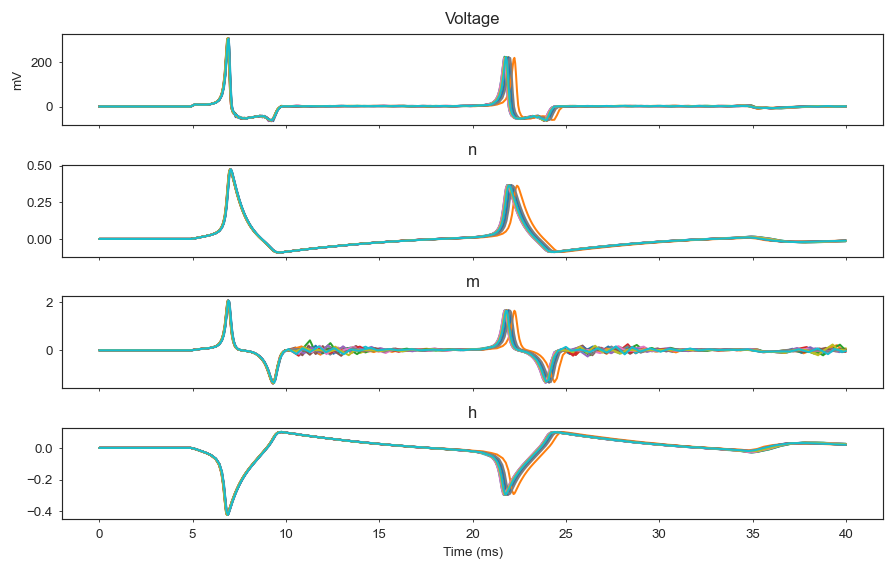

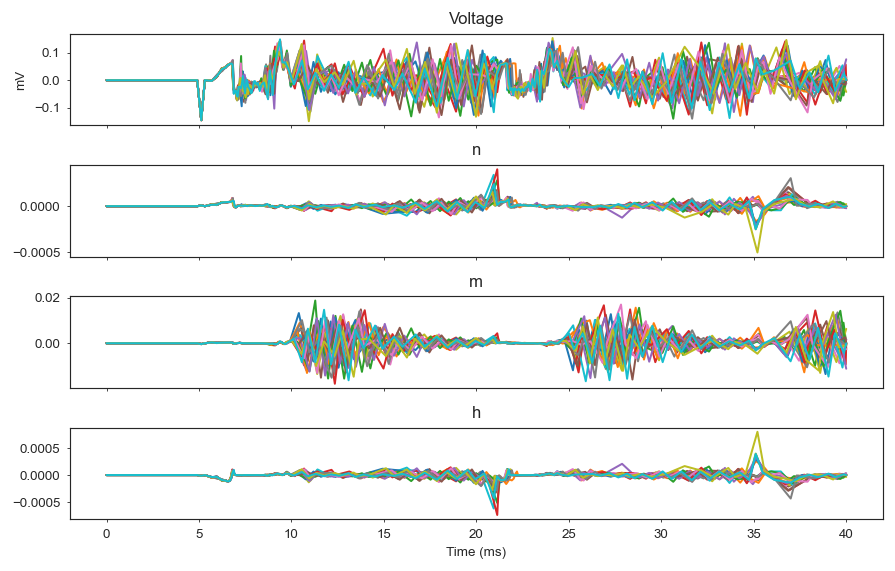

In [11]:
plot_kws = dict(max_nx_sb=1, max_ny_sb=4, y_names=neuron.get_y_names(), y_units=neuron.get_y_units(), t_unit=neuron.get_t_unit())

prb_sol.plot(plot_type='ys', **plot_kws)
prb_sol.plot(plot_type='ydots', **plot_kws)
prb_sol.plot(plot_type='errors', **plot_kws)